In [2]:
import torch

In [3]:
x = torch.rand(5,4)
print(x)

tensor([[0.4607, 0.5465, 0.1442, 0.6470],
        [0.6274, 0.7677, 0.0713, 0.6174],
        [0.3265, 0.3235, 0.3442, 0.7509],
        [0.4931, 0.8697, 0.1304, 0.8621],
        [0.1091, 0.5450, 0.1014, 0.6669]])


In [4]:
x.shape

torch.Size([5, 4])

In [5]:
x.shape[1]

4

In [6]:
x.dtype

torch.float32

In [7]:
x = torch.rand(5,3, dtype = torch.float32)
x

tensor([[0.8068, 0.8342, 0.6377],
        [0.0966, 0.0686, 0.4969],
        [0.7049, 0.6726, 0.7786],
        [0.3824, 0.8241, 0.0105],
        [0.1045, 0.1402, 0.4811]])

In [8]:
x = torch.tensor([5.0, 3], requires_grad=True)
print(x)

tensor([5., 3.], requires_grad=True)


In [9]:
x = torch.rand(2,2)
y = torch.rand(2,2)

# s = torch.sum(x,y)
print(x.dtype)
print(y.dtype)

# torch.sum(x,y,dim=1)

torch.float32
torch.float32


In [10]:
x + y

tensor([[1.8244, 0.4173],
        [1.7281, 0.7395]])

In [11]:
x[:,0].shape

torch.Size([2])

In [12]:
x[1,1]

tensor(0.1612)

In [13]:
x

tensor([[0.9728, 0.3944],
        [0.9890, 0.1612]])

In [14]:
x[1,1].item()

0.16119533777236938

In [15]:
x.view(4)

tensor([0.9728, 0.3944, 0.9890, 0.1612])

In [16]:
x.view(-1)

tensor([0.9728, 0.3944, 0.9890, 0.1612])

In [17]:
x.numpy()

array([[0.97279006, 0.3944233 ],
       [0.98895115, 0.16119534]], dtype=float32)

In [18]:
torch.cuda.is_available()

True

In [20]:
device = torch.device('cuda')
device

device(type='cuda')

In [22]:
x = torch.rand(2,2,  device=device)
x

tensor([[0.9150, 0.4230],
        [0.1824, 0.8695]], device='cuda:0')

In [25]:
x = torch.rand(2, requires_grad=True)
print('x is ', x)

x is  tensor([0.4936, 0.5979], requires_grad=True)


In [26]:
y = x*x
print('y = ',y)

y =  tensor([0.2436, 0.3575], grad_fn=<MulBackward0>)


In [31]:
z = y.sum()
z.backward()
print(x.grad)
# need to have a scalar to cal grad 

tensor([0.9872, 1.1958])


In [39]:
print(z.grad_fn)
z.grad_fn

x.requires_grad_(False)
x.requires_grad # remove requires_grad
x.requires_grad_(True)

# use with torch.no_grad()
y = x*x
print(y.requires_grad)
with torch.no_grad():
    y = x*x
    print(y.requires_grad)

True
False


In [44]:
import numpy as np
np_data = np.arange(1,11)
x_data = torch.from_numpy(np_data)
print(x_data)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


In [46]:
y_data = 2.*x_data
print(y_data)

tensor([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])


tensor(5., requires_grad=True)


In [69]:
w = torch.tensor(5.0, requires_grad=True)

print(w)
n_epochs = 100
for epoch in range(n_epochs):
    y_pred = w*x_data
    
    loss_val = ((y_pred - y_data)**2).mean()
    

    if w.grad is not None:
        print('zero_')
        w.grad.zero_()
         
    loss_val.backward()
    print('1)w.grad=',w.grad)
    with torch.no_grad():
        w -= 0.01*w.grad
    


tensor(5., requires_grad=True)
1)w.grad= tensor(28.)
zero_
1)w.grad= tensor(25.3867)
zero_
1)w.grad= tensor(23.0172)


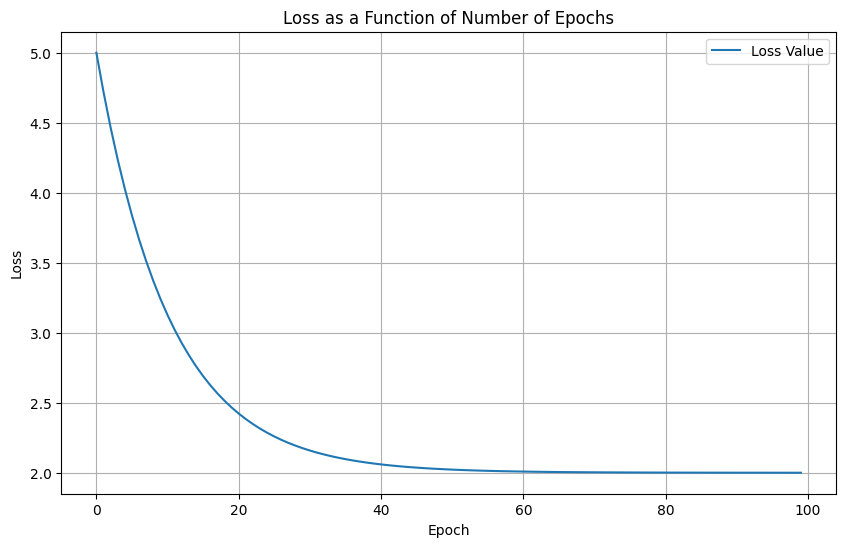

In [75]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_data and y_data need to be defined for the provided code to work.
# Let's define some sample data that could represent a simple linear relationship.

# Sample data
x_data = torch.tensor([1.0, 2.0, 3.0])
y_data = torch.tensor([2.0, 4.0, 6.0])

# Initial weight
w = torch.tensor(5.0, requires_grad=True)

# Number of epochs
n_epochs = 100

# To store the loss values
loss_values = []

for epoch in range(n_epochs):
    y_pred = w * x_data
    loss_val = ((y_pred - y_data) ** 2).mean()
    loss_values.append(w.item())

    # Cleaning grad  before applying backward
    if w.grad is not None:
        w.grad.zero_()
    
    loss_val.backward()

    # should not calculate grad of its own re-assignment
    with torch.no_grad():
        w -= 0.01 * w.grad

# Plotting the loss as a function of the number of epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Loss Value')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss as a Function of Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [115]:
# using in built pytorch functions
lin_model = torch.nn.Linear(1,1) # only one feature
print(lin_model)

Linear(in_features=1, out_features=1, bias=True)


In [116]:
lin_loss = torch.nn.MSELoss()
print(lin_loss)

MSELoss()


In [117]:
optimizer = torch.optim.SGD(lin_model.parameters(), lr=0.01)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [118]:
w,b = lin_model.parameters()
print(w,b)

Parameter containing:
tensor([[0.3032]], requires_grad=True) Parameter containing:
tensor([0.1678], requires_grad=True)


In [119]:
X = [1, 2, 3,4,5,6,7,8]
Y = [2, 4, 6,8,10,12,14,16]

# Convert to 2D tensors
X_tensor = torch.tensor(X).view(-1, 1).float()  # Convert to a column vector and ensure it's a float tensor
Y_tensor = torch.tensor(Y).view(-1, 1).float()  # Convert to a column vector and ensure it's a float tensor

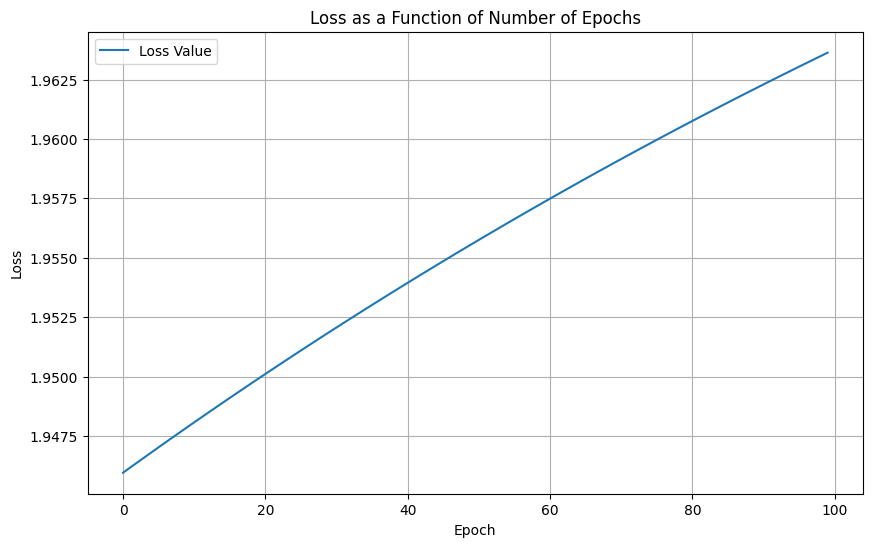

In [121]:
weight_vals = []
n_epochs = 100
for epoch in range(n_epochs):
    optimizer.zero_grad()

    y_pred = lin_model(X_tensor)

    l = lin_loss(Y_tensor, y_pred)
    l.backward()

    optimizer.step()

    w,b = lin_model.parameters()
    # print(w)
    weight_vals.append(w.item())
    
# Plotting the loss as a function of the number of epochs
plt.figure(figsize=(10, 6))
plt.plot(weight_vals, label='Loss Value')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss as a Function of Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [87]:

# Given data
X = [1, 2, 3]
Y = [2, 4, 6]

# Convert to 2D tensors
X_tensor = torch.tensor(X).view(-1, 1).float()  # Convert to a column vector and ensure it's a float tensor
Y_tensor = torch.tensor(Y).view(-1, 1).float()  # Convert to a column vector and ensure it's a float tensor

torch.tensor(X).shape

torch.Size([3])

In [122]:
weight_vals[-1]

1.9636269807815552

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
# transform is used to convert from PIL image fmt to tensor
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:08<00:00, 1224734.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 1218951.00it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1158609.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 3603959.28it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [13]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 50, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 50, shuffle = False)

In [14]:
examples = iter(test_loader)
print(examples)

In [18]:
example_data, example_target = next(examples)

In [31]:
example_target.shape

torch.Size([50])

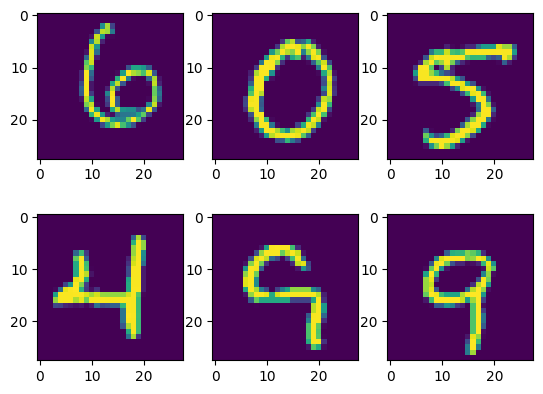

In [30]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(example_data[i].squeeze())
plt.show()

In [76]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.L1 = nn.Linear(input_size, hidden_size)
        self.L2 = nn.ReLU()
        self.L3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.L1(x)
        out1 = self.L2(out)
        out2 = self.L3(out1)

        return out2

In [77]:
device = torch.device('cuda')

In [78]:
input_size = 784
hidden_size = 500
output_size = 10

model = NeuralNet(input_size, hidden_size, output_size).to(device)

In [79]:
# loss
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [80]:
n_epochs = 50
all_loss = []
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # print(i)
        # print(images.shape)
        # print(labels)
        # break
        images_reshaped = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model.forward(images_reshaped)
        loss = criterion(outputs, labels)
        # print(loss)
        

        # back prop
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    print('Epoch number = ', epoch + 1, ' loss = ', loss.item())
    all_loss.append()

Epoch number =  1  loss =  0.06178934499621391
Epoch number =  2  loss =  0.030705727636814117
Epoch number =  3  loss =  0.011953250505030155
Epoch number =  4  loss =  0.019725175574421883
Epoch number =  5  loss =  0.04732707515358925
Epoch number =  6  loss =  0.017246969044208527
Epoch number =  7  loss =  0.0014206045307219028
Epoch number =  8  loss =  0.011036522686481476
Epoch number =  9  loss =  0.016948621720075607
Epoch number =  10  loss =  0.002053510630503297
Epoch number =  11  loss =  0.020359961315989494
Epoch number =  12  loss =  0.010563619434833527
Epoch number =  13  loss =  0.014293361455202103
Epoch number =  14  loss =  0.00011851562157971784
Epoch number =  15  loss =  0.0007176907383836806
Epoch number =  16  loss =  0.0006392955547198653
Epoch number =  17  loss =  0.002995196497067809
Epoch number =  18  loss =  0.0012254405301064253
Epoch number =  19  loss =  1.5037012417451479e-05
Epoch number =  20  loss =  0.0006653431337326765
Epoch number =  21  lo

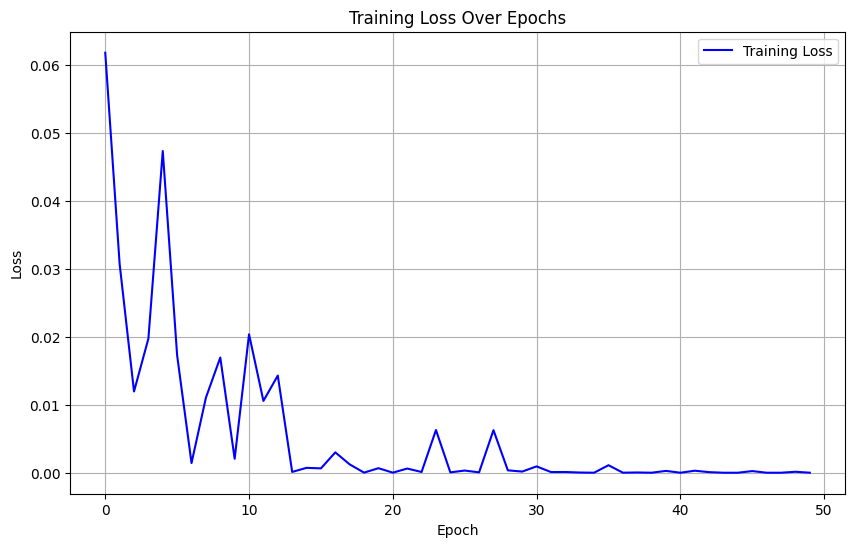

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(all_loss, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
# testing dataset
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images_reshaped = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model.forward(images_reshaped)

        _, predicted = torch.max(outputs,1)
        # print(predicted)
        n_correct += (predicted == labels).sum().item()
    print(100*n_correct/n_samples , ' accuracy')

97.95  accuracy
